# load packages

In [1]:
import scanpy as sc
import numpy as np
import torch
import anndata as ad
from scGES import scGES_API
from scGES import metric
import warnings
warnings.filterwarnings("ignore")

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/dszspur/.conda/envs/py38/lib/R'

/home/dszspur/.conda/envs/py39/lib/python3.9/site-packages/torch/cuda/__init__.py:56: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


# load datasets

The Lung dataset is available in [here](https://doi.org/10.6084/m9.figshare.12420968.v7).

In [2]:
adata = sc.read("./Lung_atlas_public.h5ad", cache=True)
adata.obs['study'] = adata.obs['batch']
variables_to_drop = adata.obs.keys().tolist()
variables_to_drop.remove('cell_type')
variables_to_drop.remove('study')
adata.obs.drop(variables_to_drop, inplace=True, axis=1)
adata.obs['celltype'] = adata.obs['cell_type']
print(adata.obs['study'].unique())

['B1', 'B2', 'B3', 'B4', 'A6', ..., '2', '4', '3', '1', '6']
Length: 16
Categories (16, object): ['1', '2', '3', '4', ..., 'B1', 'B2', 'B3', 'B4']


# scGESI

In [3]:
scges = scGES_API(adata.copy(), tech_key='study', query_name=None,celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_weight/Lung')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,1]})  
scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.61s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGES/Lung/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 32472
all labels are known with atlas
cells for train: 32472


 10%|████████▍                                                                           | 1/10 [00:27<04:07, 27.54s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 347.9773


 20%|████████████████▊                                                                   | 2/10 [01:02<04:15, 31.92s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 338.0310


 30%|█████████████████████████▏                                                          | 3/10 [01:35<03:46, 32.43s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 326.0153


 40%|█████████████████████████████████▌                                                  | 4/10 [02:15<03:32, 35.40s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 318.4178


 50%|██████████████████████████████████████████                                          | 5/10 [03:01<03:16, 39.32s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 313.9260


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [03:45<02:43, 40.88s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 310.6071


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [04:21<01:57, 39.10s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 307.6484


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [04:56<01:15, 37.91s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 305.7176


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [05:22<00:34, 34.23s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 303.5463


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [05:43<00:00, 34.32s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 301.7964
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGES/Lung/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:34<05:06, 34.05s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 0.3079, Classification Loss: 2.2026


 20%|████████████████▊                                                                   | 2/10 [01:09<04:37, 34.73s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.3111, Classification Loss: 2.2376


 30%|█████████████████████████▏                                                          | 3/10 [01:35<03:36, 30.98s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 0.2904, Classification Loss: 2.1407


 40%|█████████████████████████████████▌                                                  | 4/10 [02:01<02:53, 28.97s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 0.2536, Classification Loss: 2.1071


 50%|██████████████████████████████████████████                                          | 5/10 [02:38<02:39, 31.91s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 0.2918, Classification Loss: 2.1461


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [03:21<02:22, 35.62s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 0.2887, Classification Loss: 2.1168


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [04:02<01:51, 37.28s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.2422, Classification Loss: 2.1046


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [04:28<01:07, 33.78s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.2975, Classification Loss: 2.1033


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [04:59<00:32, 32.81s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.2487, Classification Loss: 2.1295


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [05:26<00:00, 32.61s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.2776, Classification Loss: 2.1056
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGES/Lung/atlas_model_LVG.pth.


# Integration Results of scGESI

In [4]:
import matplotlib.pyplot as plt
from anndata import AnnData
from copy import deepcopy

adata_results = scges.atlas.copy()

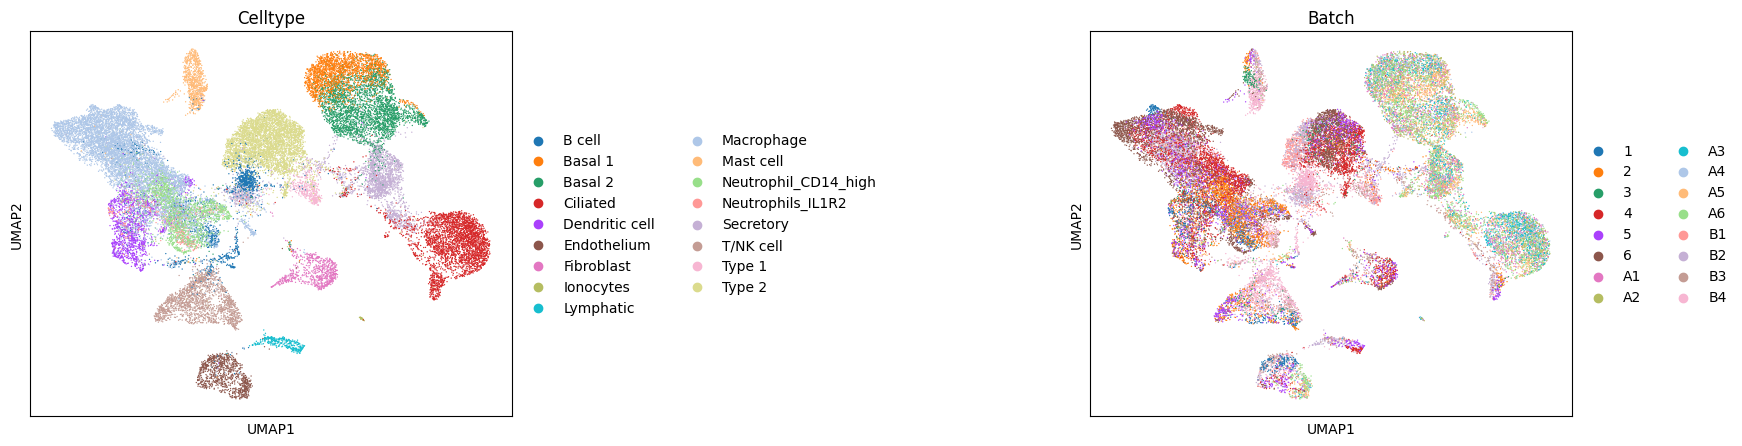

In [5]:
temporary_HVG = AnnData(deepcopy(adata_results.obsm['atlas HVG denoised']))
temporary_HVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "study"],  title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

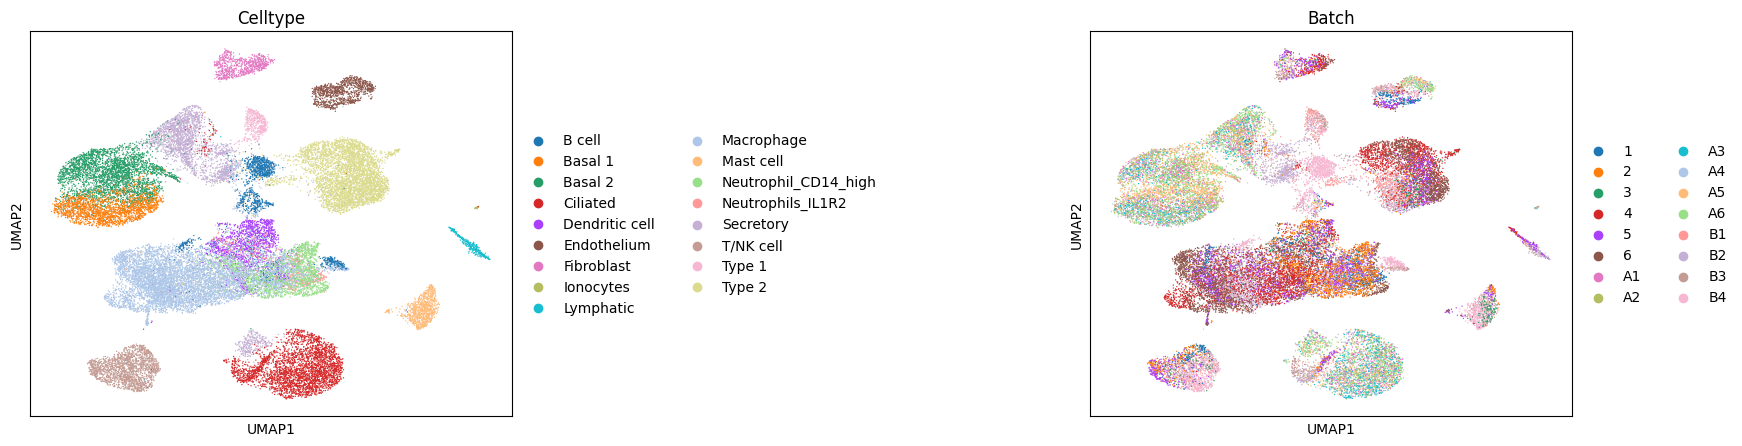

In [6]:
temporary_LVG = AnnData(deepcopy(adata_results.obsm['atlas LVG denoised']))
temporary_LVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

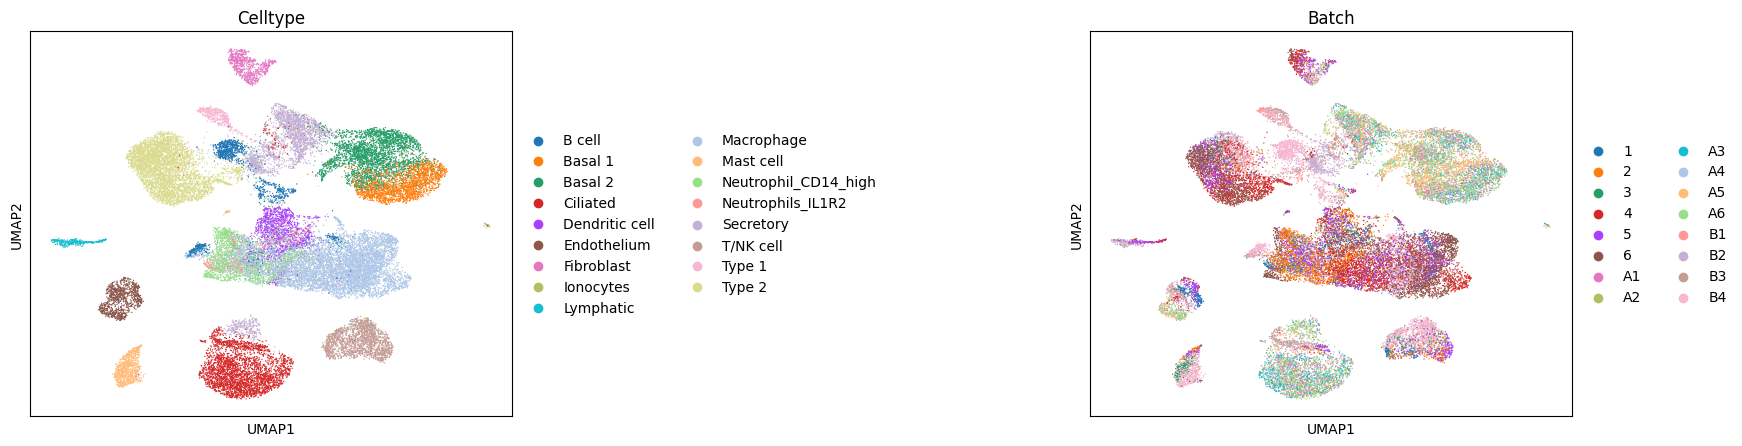

In [7]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_results.obsm["atlas HVG denoised"], adata_results.obsm["atlas LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_results.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# scGESM

In [8]:
query_tech = 'B1'
scges = scGES_API(adata.copy(), tech_key='study', query_name= query_tech, celltype_key = 'cell_type', batch_size = 64,
                  train_params={'num_epochs': 5, 'lr': 0.001},device = device, 
                  mode_save_dir='methods_results/scGESM/Lung')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,1]})  
scges.train_map(model_type = 'HVG',train_params = {'num_epochs': 5, 'lr': 0.001, 'weight':[1,1]}) 

scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]})  
scges.train_map(model_type = 'LVG',train_params = {'num_epochs': 5, 'lr': 0.001,'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.55s/it]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/Lung/pretrain_model.pth.
Loaded pre-trained weights for pretrain_model from methods_results/scGESM/Lung/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 30332
all labels are known with atlas
cells for train: 30332


 10%|████████▍                                                                           | 1/10 [00:22<03:20, 22.31s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 772.9284


 20%|████████████████▊                                                                   | 2/10 [00:44<03:00, 22.53s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 761.4356


 30%|█████████████████████████▏                                                          | 3/10 [01:04<02:27, 21.06s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 752.1637


 40%|█████████████████████████████████▌                                                  | 4/10 [01:27<02:10, 21.78s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 743.7175


 50%|██████████████████████████████████████████                                          | 5/10 [01:50<01:51, 22.20s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 736.4207


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [02:13<01:30, 22.54s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 729.8629


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [02:36<01:07, 22.62s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 723.8117


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [02:58<00:45, 22.60s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 718.3613


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [03:20<00:22, 22.38s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 713.6102


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [03:37<00:00, 21.79s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 709.2371
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/Lung/atlas_model_HVG.pth.


...  MAP HVG train ...
mnns and knns of mapping
mnn dict 2140
cells for train: 2140
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/Lung/atlas_model_HVG.pth.
Fixed weight completion!


 20%|█████████████████                                                                    | 1/5 [00:01<00:04,  1.04s/it]

map_model_HVG - Epoch [1/5], Tatol Loss: 512.3757


 40%|██████████████████████████████████                                                   | 2/5 [00:02<00:03,  1.01s/it]

map_model_HVG - Epoch [2/5], Tatol Loss: 488.3405


 60%|███████████████████████████████████████████████████                                  | 3/5 [00:03<00:01,  1.00it/s]

map_model_HVG - Epoch [3/5], Tatol Loss: 466.4448


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [00:04<00:01,  1.18s/it]

map_model_HVG - Epoch [4/5], Tatol Loss: 446.7225


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.18s/it]

map_model_HVG - Epoch [5/5], Tatol Loss: 429.3950
Model weights have been saved.
Loaded pre-trained weights for map_model_HVG from methods_results/scGESM/Lung/map_model_HVG.pth.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGESM/Lung/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:25<03:48, 25.41s/it]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 0.3113, Classification Loss: 2.3386


 20%|████████████████▊                                                                   | 2/10 [00:48<03:10, 23.87s/it]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 0.2888, Classification Loss: 2.2080


 30%|█████████████████████████▏                                                          | 3/10 [01:08<02:37, 22.45s/it]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 0.2919, Classification Loss: 2.1931


 40%|█████████████████████████████████▌                                                  | 4/10 [01:33<02:18, 23.12s/it]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 0.2825, Classification Loss: 2.1238


 50%|██████████████████████████████████████████                                          | 5/10 [01:56<01:56, 23.40s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 0.3036, Classification Loss: 2.1202


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [02:22<01:37, 24.27s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 0.2790, Classification Loss: 2.1109


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [02:44<01:09, 23.25s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 0.2643, Classification Loss: 2.1199


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [03:10<00:48, 24.14s/it]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 0.2827, Classification Loss: 2.1154


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [03:31<00:23, 23.12s/it]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 0.2748, Classification Loss: 2.1303


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [03:51<00:00, 23.18s/it]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 0.2791, Classification Loss: 2.1170
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/Lung/atlas_model_LVG.pth.


... map LVG train ...
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/Lung/atlas_model_LVG.pth.


 20%|█████████████████                                                                    | 1/5 [00:22<01:28, 22.18s/it]

map_model_LVG - Epoch [1/5], Reconstruction Loss: 0.2269, Classification Loss: 2.3021


 40%|██████████████████████████████████                                                   | 2/5 [00:45<01:08, 22.84s/it]

map_model_LVG - Epoch [2/5], Reconstruction Loss: 0.2714, Classification Loss: 2.2950


 60%|███████████████████████████████████████████████████                                  | 3/5 [01:07<00:44, 22.27s/it]

map_model_LVG - Epoch [3/5], Reconstruction Loss: 0.2861, Classification Loss: 2.1796


 80%|████████████████████████████████████████████████████████████████████                 | 4/5 [01:28<00:22, 22.09s/it]

map_model_LVG - Epoch [4/5], Reconstruction Loss: 0.2451, Classification Loss: 2.2606


100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:50<00:00, 22.14s/it]

map_model_LVG - Epoch [5/5], Reconstruction Loss: 0.2712, Classification Loss: 2.3215
Model weights have been saved.
Loaded pre-trained weights for map_model_LVG from methods_results/scGESM/Lung/map_model_LVG.pth.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGESM/Lung/atlas_model_LVG.pth.


# Mapping Results of scGESM

In [9]:
adata_map = scges.adatamap.copy()

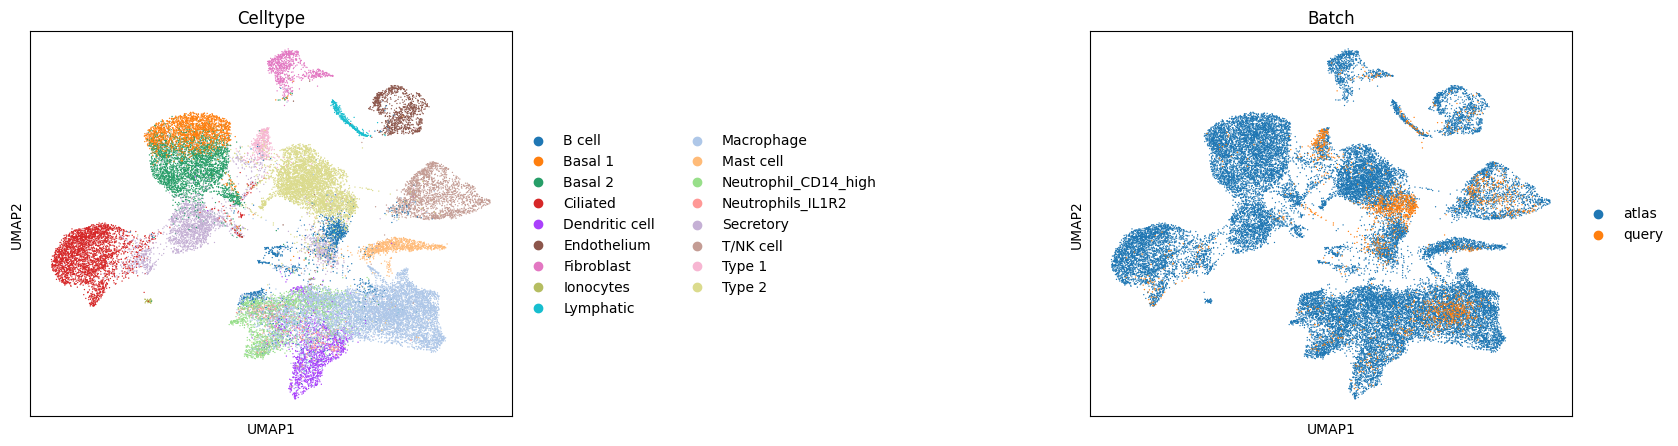

In [10]:
temporary_HVG = AnnData(deepcopy(adata_map.obsm['map HVG denoised']))
temporary_HVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

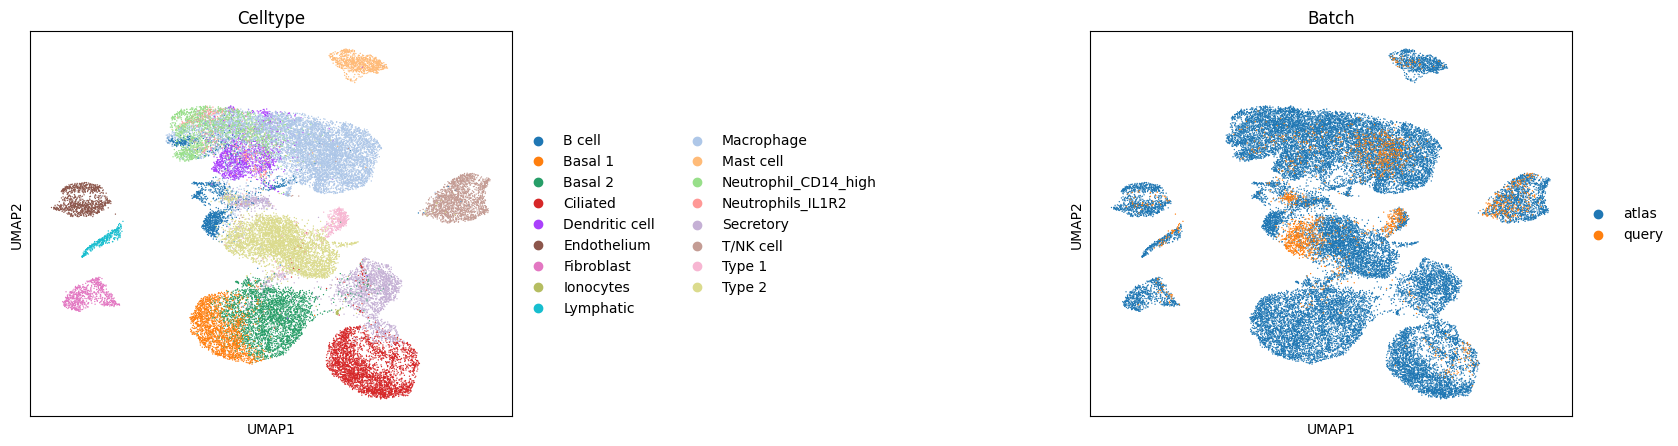

In [11]:
temporary_LVG = AnnData(deepcopy(adata_map.obsm['map LVG denoised']))
temporary_LVG.obs = adata_map.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

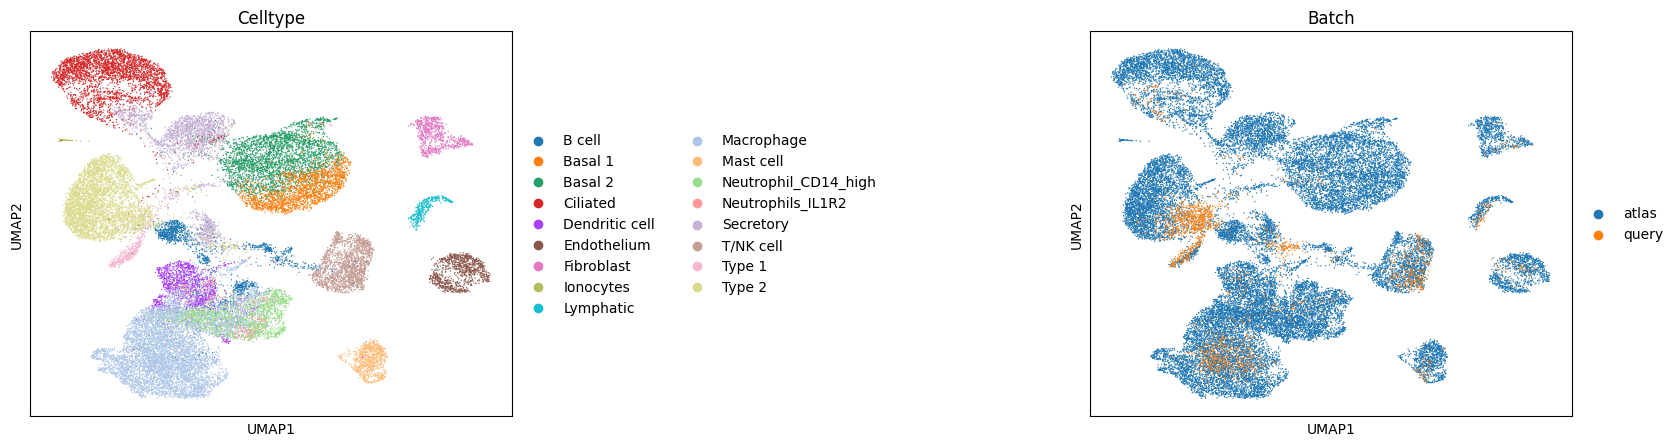

In [12]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_map.obsm["map HVG denoised"], adata_map.obsm["map LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_map.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "batch"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

# Label Transfer

In [13]:
import numpy as np
import pandas as pd
from collections import Counter
import scanpy as sc
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [14]:
temporary_HVG.obsm['HVG denoised pca'] = temporary_HVG.obsm['X_pca']
temporary_HVG.obsm['LVG denoised pca'] = temporary_LVG.obsm['X_pca']
temporary_HVG.obsm['ALL denoised pca'] = temporary_ALL.obsm['X_pca']

In [15]:
adata_ref = temporary_HVG[temporary_HVG.obs['batch'] != 'query']
adata_query = temporary_HVG[temporary_HVG.obs['batch'] == 'query']

In [16]:
# First
adata_query.obs['predictions'] = metric.Label_transfer(adata_query, adata_ref, n_neighbors=20, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
index = np.where(adata_query.obs['predictions'] == 0)[0].tolist() 

# Second
if len(index) >1:
    label = metric.Label_transfer(adata_query, n_neighbors=30,  index = index, emb_key = 'HVG denoised pca', ref_label_key = 'celltype')
adata_query.obs.loc[adata_query.obs.index[index], 'predictions'] = label

In [18]:
R = metric.Metric_label(adata_query.obs['celltype'], adata_query.obs['predictions'])
print(R['MedF1'])
print(R['Acc'])

0.9210526315789475
0.8285046728971963
